# Reduced model

## Data Import

In [1]:
# Import libraries

# Data & model loading
import pandas as pd
import numpy as np

# preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from itertools import cycle
import seaborn as sns

# Performance metrics
from sklearn import metrics
import joblib

In [2]:
X = pd.read_excel('Inputs/X.xlsx', index_col='Scene no.').copy()
y = pd.read_excel('Inputs/y.xlsx', index_col='Scene no.').copy()

In [3]:
# Drop y with Consider class which has only 5 records
y = y[y['CDU options'] != 8]
X = X.drop(['Scene 26', 'Scene 1247', 'Scene 1380', 'Scene 1655', 'Scene 2109']) # y[y['CDU options'] == 8].index.values

# Data
X_reduced = X[['evaporation_and_natural_disperson','E_ss', 'E_sl', 'E_sw', 'sufficient_mixing_energy','E_ssC', 'seawater', 'E_ssI','soot_pollution', 'displacement']]

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.20, random_state=12)

In [4]:
display(X_reduced)

,evaporation_and_natural_disperson,E_ss,E_sl,E_sw,sufficient_mixing_energy,E_ssC,seawater,E_ssI,soot_pollution,displacement
Scene no.,,,,,,,,,,
Scene 1,0.325843,0.5,0.5,0.5,1,1.0,0,1.0,1,0
Scene 2,0.483146,0.5,0.0,0.5,0,0.5,0,0.5,1,1
Scene 3,0.764045,1.0,0.5,0.5,1,0.5,0,0.0,1,1
Scene 4,0.910112,0.5,0.5,0.5,1,0.5,0,0.5,1,0
Scene 5,0.393258,1.0,0.5,0.5,0,0.5,0,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...
Scene 3096,0.539326,0.5,1.0,0.5,0,0.5,0,0.5,0,0
Scene 3097,0.449438,0.5,1.0,0.5,0,0.5,0,0.5,0,0
Scene 3098,0.483146,1.0,0.0,0.5,0,1.0,0,0.0,1,1


## Modeling
### Training

In [5]:
# modeling
model_GB_ins =  GaussianNB()
model_BIMReTA = MultiOutputClassifier(model_GB_ins).fit(X_train, y_train)

### Save the reduced model

In [ ]:
joblib.dump(model_BIMReTA, '../models/model_BIMReTA.pkl')

### Classification/ Ranking

In [6]:
# Classify
print(X_test.shape)
y_pred = model_BIMReTA.predict(X_test)
y_score = model_BIMReTA.predict_proba(X_test)

(619, 10)

### Model Assessment

In [7]:
print('----------------------------Confusion Matrix--------------')
print('MCR')
display(metrics.confusion_matrix(y_test.iloc[:,0], y_pred[:,0]))

print('CDU')
display(metrics.confusion_matrix(y_test.iloc[:,1], y_pred[:,1]))

print('ISB')
display(metrics.confusion_matrix(y_test.iloc[:,2], y_pred[:,2]))


print('----------------------------Classification Report--------------')
print('MCR')
print(metrics.classification_report(y_test.iloc[:,0],y_pred[:,0]))
print('CDU')
print(metrics.classification_report(y_test.iloc[:,1],y_pred[:,1]))
print('ISB')
print(metrics.classification_report(y_test.iloc[:,2],y_pred[:,2]))

----------------------------Confusion Matrix--------------
MCR


array([[146,   0,   0,  83],
       [  0,   1,  24,   0],
       [  0,   0,  80,   0],
       [ 76,   0,  86, 123]], dtype=int64)

CDU


array([[317,  13,  84],
       [  0,  27,   0],
       [  2,  13, 163]], dtype=int64)

ISB


array([[ 32,   0,   0],
       [ 33, 126,   0],
       [ 38,   0, 390]], dtype=int64)

----------------------------Classification Report--------------
MCR
              precision    recall  f1-score   support

          -2       0.66      0.64      0.65       229
           2       1.00      0.04      0.08        25
           8       0.42      1.00      0.59        80
          10       0.60      0.43      0.50       285

    accuracy                           0.57       619
   macro avg       0.67      0.53      0.45       619
weighted avg       0.61      0.57      0.55       619

CDU
              precision    recall  f1-score   support

         -10       0.99      0.77      0.86       414
          -2       0.51      1.00      0.67        27
          10       0.66      0.92      0.77       178

    accuracy                           0.82       619
   macro avg       0.72      0.89      0.77       619
weighted avg       0.88      0.82      0.83       619

ISB
              precision    recall  f1-score   support

          -2       0.31      1.00      0.47        32

In [25]:
print('----------------------------ROC AUC--------------')
print('MCR')
print(metrics.roc_auc_score(y_test.iloc[:,0],y_score[0], multi_class='ovo'))
print('CDU')
print(metrics.roc_auc_score(y_test.iloc[:,1],y_score[1], multi_class='ovo'))
print('ISB')
print(metrics.roc_auc_score(y_test.iloc[:,2],y_score[2], multi_class='ovo'))

----------------------------ROC AUC--------------
MCR
0.8078831734084119
CDU
0.9453979459384841
ISB
0.957310448260154


In [9]:
y_score[1]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.25222870e-06, 0.00000000e+00, 9.99991748e-01],
       [7.28517906e-06, 0.00000000e+00, 9.99992715e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Compare with Full model

### Data of full & reduced model

In [10]:
# 
# import data
X = pd.read_excel('Inputs/X.xlsx', index_col='Scene no.').copy()
y = pd.read_excel('Inputs/y.xlsx', index_col='Scene no.').copy()

# Drop y with Consider class which has only 5 records
#y = y[y['CDU options'] != 8]
#X = X.drop(['Scene 26', 'Scene 1247', 'Scene 1380', 'Scene 1655', 'Scene 2109']) # y[y['CDU options'] == 8].index.values



In [11]:
# Data for reduced model
# MCR
# Data
X_reduced_mcr = X[['evaporation_and_natural_disperson','E_ss', 'E_sl', 'E_sw']]
y_m_b = label_binarize(y['MCR options'], classes=[10, 8, 2, -2])
n_classes = y_m_b.shape[1]
X_train_mcr, X_test_mcr, y_train_mcr, y_test_mcr = train_test_split(X_reduced_mcr, y_m_b, test_size=0.20, random_state=12)

# CDU
X_reduced_cdu = X[[ 'sufficient_mixing_energy','E_ssC', 'seawater']]
y_c_b = label_binarize(y['CDU options'], classes=[10, 8, -2, -10])
n_classes = y_c_b.shape[1]
X_train_cdu, X_test_cdu, y_train_cdu, y_test_cdu = train_test_split(X_reduced_cdu, y_c_b, test_size=0.20, random_state=12)

# ISB
X_reduced_isb = X[[ 'E_ssI','soot_pollution', 'displacement']]
y_i_b = label_binarize(y['ISB options'], classes=[10, 8, -2])
n_classes = y_i_b.shape[1]
X_train_isb, X_test_isb, y_train_isb, y_test_isb = train_test_split(X_reduced_isb, y_i_b, test_size=0.20, random_state=12)


In [12]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
#models.append(('LR', LogisticRegression()))
models.append(('NB', OneVsRestClassifier(GaussianNB())))
# evaluate each model in turn
results = []
names = []
kfold = model_selection.KFold(n_splits=10)

for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results_m = model_selection.cross_val_score(model, X_reduced_mcr, y_m_b, cv=kfold, scoring='f1_samples') # , =scoring
	#cv_results2 = model_selection.cross_val_score(model, X_reduced_cdu, y_c_b, cv=kfold, scoring='roc_auc') # , =scoring
	results.append(cv_results_m)
	names.append(name)
    

cv_results_m = model_selection.cross_val_score(model, X, y_m_b, cv=kfold, scoring='roc_auc') # , =scoring
results.append(cv_results_m)
names.append('MCR_F')

cv_results_c = model_selection.cross_val_score(model, X, y_c_b, cv=kfold, scoring='roc_auc') # , =scoring
results.append(cv_results_c)
names.append('CDU_F')

cv_results_i = model_selection.cross_val_score(model, X, y_i_b, cv=kfold, scoring='roc_auc') # , =scoring
results.append(cv_results_i)
names.append('ISB_F')


cv_results_m2 = model_selection.cross_val_score(model, X_reduced_mcr, y_m_b, cv=kfold, scoring='roc_auc') # , =scoring
results.append(cv_results_m2)
names.append('MCR_r')

cv_results_c2 = model_selection.cross_val_score(model, X_reduced_cdu, y_c_b, cv=kfold, scoring='roc_auc') # , =scoring
results.append(cv_results_c2)
names.append('CDU_r')

cv_results_i2 = model_selection.cross_val_score(model, X_reduced_isb, y_i_b, cv=kfold, scoring='roc_auc') # , =scoring
results.append(cv_results_i2)
names.append('ISB_r')



C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\sklearn\metrics\_scorer.py", line 381, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\sklearn\metrics\_ranking.py", line 575, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\tanmo\.conda\envs\prefer

0    0.506613
1    0.815521
2    0.932605
3    0.964228
4    0.822531
5    0.934289
6    0.961211
dtype: float64

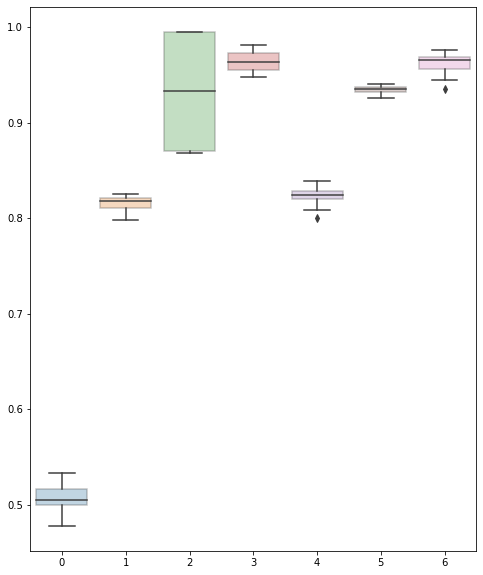

In [13]:
#sns.boxplot(x=results, y=names, palette="Set3")
boxplot_df = pd.DataFrame(results).T

fig4, ax = plt.subplots(figsize=(8,10))

sns.boxplot(data=boxplot_df, boxprops=dict(alpha=.3))
fig4.savefig('Outputs/boxplot_.png', dpi = 600)

boxplot_df.mean(axis=0)

### ROC Curve of reduced model

In [14]:
y_train_mcr

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

#### MCR ROC curve

In [15]:
classifier_mcr = OneVsRestClassifier(GaussianNB()).fit(X_train_mcr, y_train_mcr)
y_score_mcr = classifier_mcr.predict_proba(X_test_mcr)
y_pred_mcr = classifier_mcr.predict(X_test_mcr)

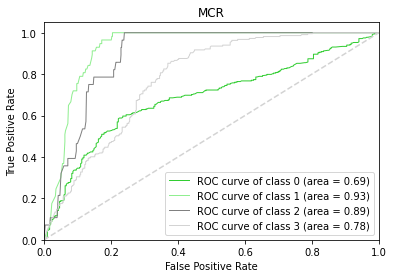

In [16]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_mcr.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_mcr[:, i], y_score_mcr[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_mcr.ravel(), y_score_mcr.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig1_mcrReduced = plt.figure()

colors = cycle(['limegreen', 'lightgreen', 'gray', 'lightgray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "--", color='lightgray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MCR")
plt.legend(loc="lower right")
plt.show()


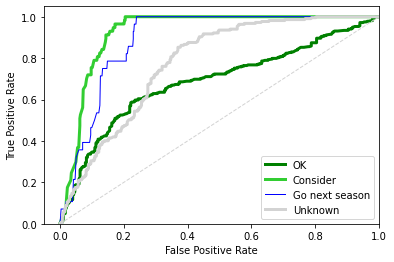

In [17]:
# 
fig2_reduced = plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_mcr[:, i], y_score_mcr[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
color_c = ['green', 'limegreen', 'blue', 'lightgray']
class_c = ['OK', 'Consider', 'Go next season','Unknown']
lw = [3,3,1,3]
#linestyle = ['solid', 'dashed', '-.', '-.']
# opacity/ transparency in lineplot ++

for i, color in zip(range(n_classes), color_c):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw[i], 
             label=class_c[i]) 
plt.plot([0, 1], [0, 1], '--', color= 'lightgray',lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")

plt.show()
fig2_reduced.savefig('Outputs/ROC curve MCR 1 reduced.png', dpi = 600)

#### CDU ROC curve

C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


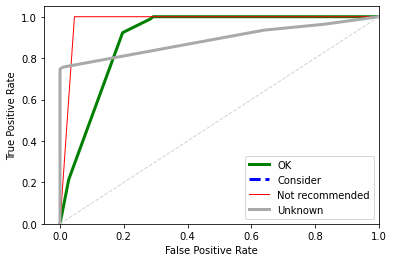

C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


{0: 0.8988032515429776, 1: nan, 2: 0.9773869346733669, 3: 0.8878225095503969}

In [18]:
# CDU
classifier = OneVsRestClassifier(GaussianNB()).fit(X_train_cdu, y_train_cdu)
y_score_cdu = classifier.predict_proba(X_test_cdu)
y_pred_cdu = classifier.predict(X_test_cdu)
n_classes = y_test_cdu.shape[1]

fig2_reduced = plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_cdu[:, i], y_score_cdu[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
color_c = ['green', 'blue', 'red', 'darkgray']
class_c = ['OK', 'Consider', 'Not recommended','Unknown']
linestyle = ['solid', 'dashed', 'solid', 'solid']
lw = [3,3,1,3]
# opacity/ transparency in lineplot ++

for i, color in zip(range(n_classes), color_c):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw[i], linestyle=linestyle[i],
             label=class_c[i]) 
plt.plot([0, 1], [0, 1], '--', color= 'lightgray',lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()
fig2_reduced.savefig('Outputs/ROC curve cdu 1 reduced.png', dpi = 600)

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_cdu[:, i], y_score_cdu[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
roc_auc

#### ISB ROC Curve

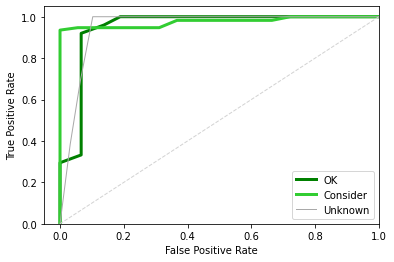

{0: 0.9491600885637275, 1: 0.9754771241830065, 2: 0.9534447034447034}

In [19]:
# ISB
classifier = OneVsRestClassifier(GaussianNB()).fit(X_train_isb, y_train_isb)
y_score_isb = classifier.predict_proba(X_test_isb)
y_pred_isb = classifier.predict(X_test_isb)
n_classes = y_test_isb.shape[1]

fig4 = plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_isb.shape[1]):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_isb[:, i], y_score_isb[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
color_i = ['green', 'limegreen',  'darkgray']
class_i = ['OK', 'Consider', 'Unknown']
linestyle = ['solid', 'solid', 'solid']

for i, color in zip(range(y_test_isb.shape[1]), color_i):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw[i], 
             label=class_i[i], linestyle=linestyle[i]) 
plt.plot([0, 1], [0, 1], '--', lw=1, color='lightgray')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()
fig4.savefig('Outputs/ROC curve isb, reduced, name.png', dpi = 600)

# print roc values
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_isb[:, i], y_score_isb[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
roc_auc

In [20]:
"""1. ROC curve in this Notebook is for OnevsRest classifier (not Multioutput classifier)

"""

'1. ROC curve in this Notebook is for OnevsRest classifier (not Multioutput classifier)\n\n'